# Assignment 6: Basic Machine Learning

Gruppe Dangerous Memory: Christian, Alexander

https://github.com/datsoftlyngby/soft2019fall-bi-teaching-material/tree/master/week40/assignment_6

## Part 1: Predicting Hackernews Points With Linear Regression in One Variable


### Part 1.1: Data preprocessing
Hand-in a plot that shows time on the x-axis and number of points on the y-axis.

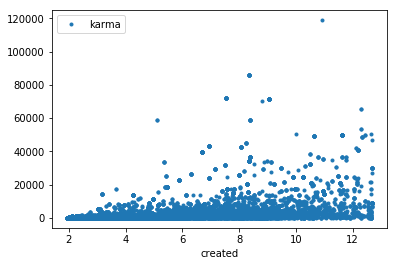

In [4]:
import pandas as pd
users_df = pd.read_json ("users.json") # ['about', 'created', 'error', 'id', 'karma', 'submitted']
users_df_plot = users_df.copy()
users_df_plot['created'] = (pd.datetime.now().timestamp()  - users_df_plot['created']) / 60 / 60 /24 / 365.25

ax1 = users_df_plot.plot(x='created', y='karma', style=".")
ax1

### Part 1.2: Model selection
**Describe with at least five lines of text: which model you chose, and why.**

The size of the users dataset is 56586 entries. 

From the task description, "Predicting Hackernews Points With Linear Regression in One Variable", we have a strong indicator of which ML model to choose: Regression.

Taking a look at the scikit-learn ["Choosing the right estimator"](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) chart/cheat-sheet:

The samle is >50, we are not to predict a category, but are to predict quantity, a relevant ML model to use could be [SGD Regressor](https://scikit-learn.org/stable/modules/sgd.html). Furthermore, reading from the SGD Regressor documentation for [Regression](https://scikit-learn.org/stable/modules/sgd.html#regression): *"SGDRegressor is well suited for **regression** problems with a large number of training samples (> 10.000)"*.

### Part 1.3: Model training
**Hand-in the code (markdown will do) that trains the data.**

In [5]:
# Modified example code used from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Remove rows containing na values in created and karma columns
users_df_plot = users_df_plot.dropna(subset=['created', 'karma'])

# Load the dataset
# Container object for datasets: Dictionary-like object that exposes its keys as attributes.
users_bunch = Bunch(created =np.array(users_df_plot['created']), karma=np.array(users_df_plot['karma']))

X = users_bunch.created[:, None]
y = users_bunch.karma[:, None]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


### Part 1.4: Model Validation 

**1. A one-page description of the model parameters -- number of which are model dependent:** 

*Why are they there?
What is their purpose in the model?
What do they explain for your data?
How are they helping you to predict how much time you need to be active in order to gain Hackernews points?*

"X" contains the "created" dataset.

"y" contains the "karma" dataset.

"train_test_split" - Split arrays or matrices into random train and test (20%) subsets



**2. A visual plot of the model that explains the description above. In the case of a linear regression this is a line that shows how the model expects how long a user needs to be active (x value) in order to get a certain number of points (y value).**


coefficient of determination: 0.13912565747723138
Intercept:  [-3022.6144348]
Slope:  [[1178.78471984]]


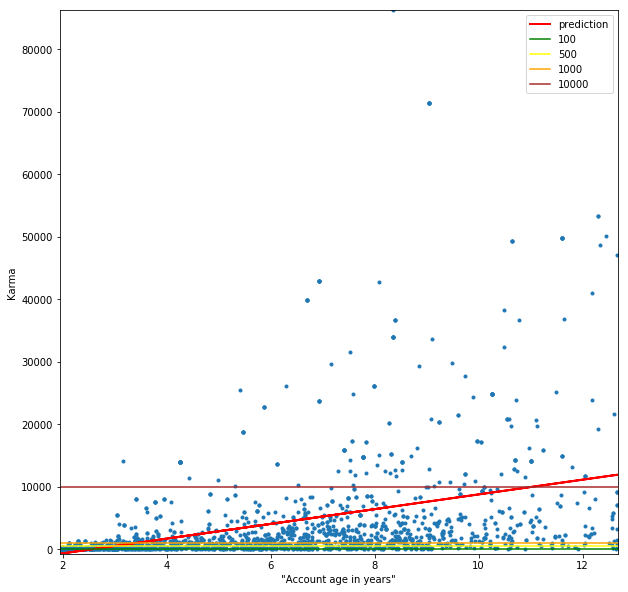

In [6]:
# Make predictions using the testing set

r_sq = regressor.score(X, y)
print('coefficient of determination:', r_sq)
print("Intercept: ", regressor.intercept_) 
print("Slope: ",regressor.coef_) 
y_pred = regressor.predict(X_test)

# Plot outputs
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Karma')
ax1.set_xlabel('"Account age in years"')
plt.scatter(X_test, y_test, marker=".")

plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.axhline(y=100, color='green', linestyle='-')
plt.axhline(y=500, color='yellow', linestyle='-')
plt.axhline(y=1000, color='orange', linestyle='-')
plt.axhline(y=10000, color='brown', linestyle='-')


#plt.xticks(())
#plt.yticks(())

# align plots to axis
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.legend(["prediction", "100","500", "1000","10000"])

plt.show()

**3. Explain: What does it take to get 1000 points? How long would you have to be active on Hackernews?**


Visually, from the plot it seems that the trained model predicts that an account has to be active for _around 3 years to reach 1000 karma points_.


**4. Explain: how you have sanity checked your resulting trained/validated model: What does it take to get 1000 points? 500 points? 10000 points? 100 points? How long would you have to be active on Hackernews in those cases?**

Visually, it seems it would take the X years of activity to reach Y karma points:
- < 3 year => 100 karma points
- ~ 3 year => 500 karma points
- ~3.5 year => 1000 karma points
- ~11 year => 10000 karma points

The results seems plausible.

## Part 2: Predicting Hackernews Points With Multivariate Linear Regression

Here, instead of only using time to predict number of Hackernews points, we use both time and number_of_ posts (submitted) to predict the number of Hackernews points, ie, we are using an additional feature (3 dimensions = points, time, number of posts).


In [8]:
X = users_df_plot[['created', 'submitted']]
y = users_df_plot['karma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**A description of the parameters**

NEEDS UPDATE!!!!!!!!!!!!!!!!

The parameters are similar to the 2d linear regression example further above, but here an additional target/feature is added:

"X" contains the "created" and the "submitted" dataset.

"y" contains the "karma" dataset.

"train_test_split" - Split arrays or matrices into random train and test (20%) subsets

In [10]:
r_sq = regressor.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7116217212925013


**An analysis of how much time you need to be active on Hackernews, plus how many posts you need to reach 1000 points.**
- Explain: how much does the number of posts contribute to get the points? How much do the time since registration explain?*

Earlier, when just estimating how long a user needs to be active in order to get a certain number of points (points and time), **the coefficient of determination was 0.1391256574772315.** This is considered low, which could indicate that only using these specific features is suboptimal when trying to predict.

Here, when using a new feature/dimension (points, time and number of posts), **the coefficient of determination is 0.7116217212925011.** [This is considered good](http://blog.uwgb.edu/bansalg/statistics-data-analytics/linear-regression/what-does-coefficient-of-determination-explain-in-terms-of-variation/), which could indicate that using this aditional feature helps optimizing the predictability of the model. This indicates that the number of posts contributes rather significantly to the karma points amount. 

## Part 3: Prediction of breast cancer malignity

### Part 3.1: Looking at the data - Report the head of the table. Write two lines about notable features of the data. How big is your dataset? What are the different variables? Etc...?

In [10]:
wdbc_df = pd.read_csv ("wdbc.data", header=None, names=['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave points1', 'symmetry1', 'fractal dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave points2', 'symmetry2', 'fractal dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave points3', 'symmetry3', 'fractal dimension3'])
wdbc_df.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


the data set contains 3 instances for each feature.  
the data set contains 569 diagnosis's each having 32 columns.

### Part 3.2: Building the model - Hand-in a description of your chosen variables and why you think they could help predict breast cancer.

None of us are doctors with a specialty in breast cancer so we have picked 6 at random

In [21]:
y = wdbc_df['Diagnosis']
x = wdbc_df[['perimeter1','smoothness2','symmetry3','texture1','fractal dimension2','compactness3']]

1) perimeter  
2) smoothness (local variation in radius lengths)  
3) symmetry  
1) texture (standard deviation of gray-scale values)  
2) fractal dimension ("coastline approximation" - 1)  
3) compactness (perimeter^2 / area - 1.0)  
We think they would help because of random.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import svm

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

SVM = svm.LinearSVC(max_iter=1000000)
SVM.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### Part 3.3 Evaluating the model 

- the accuracy of the score
- five lines describing what that number of accuracy actually means.
is the data set 'balanced'?
- should a ROC curve-based or perhaps a precision-recall optimization be used here?
- what can the number tell you when you inform patiens whether their cancer is benign or malign?
- do you dare do synthetic minority oversampling synthesis (SMOTE) -- if needed (check labelling 'balance') -- on this data to obtain higher accuracy? (this is a serious question if you are working in health care for real!)

In [41]:
from sklearn.metrics import accuracy_score
y_pred = SVM.predict(x_test)
accuracy_score(y_test, y_pred)

0.9574468085106383

An accuracy score of 95% means that in only 5% of the cases the predicted lable is wrong.

In [48]:
wdbc_df['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

We would say that the data set is fairly balanced.
Synthetically oversampling could make the model better but it could also make it useless.